# Used Bike Price prediction in India and use a comparative study to see what are the factors reponsible for price fluctuation.

In [6]:
# import necessary libraries
import numpy as np # for numerical analysis
import pandas as pd # for data wrangling
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

import warnings
warnings.filterwarnings("ignore") # supress warning messages

In [7]:
# reading the dataset
data = pd.read_csv("D:/data sets/used bikes price/Used_Bikes.csv")
data

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj
32646,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16,125,Hero


In [8]:
# make a copy of the dataset
df =data
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj
32646,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16,125,Hero


In [9]:
#deleting the unnecessary column
df.drop(['bike_name'], axis = 1, inplace = True)

In [10]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,600000,Delhi,110,First Owner,8,675,Triumph
3,65000,Bangalore,16329,First Owner,4,180,TVS
4,80000,Bangalore,10000,First Owner,3,150,Yamaha


In [11]:
#checking duplicate rows if any.
len(data)-len(data.drop_duplicates())


25328

In [12]:
# dropping the duplicate rows
df.drop_duplicates()

,price,city,kms_driven,owner,age,power,brand
0,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,600000,Delhi,110,First Owner,8,675,Triumph
3,65000,Bangalore,16329,First Owner,4,180,TVS
4,80000,Bangalore,10000,First Owner,3,150,Yamaha
...,...,...,...,...,...,...,...
9362,25000,Delhi,48587,First Owner,8,150,Hero
9369,35000,Bangalore,60000,First Owner,9,220,Bajaj
9370,450000,Jodhpur,3430,First Owner,4,750,Harley-Davidson
9371,139000,Hyderabad,21300,First Owner,4,400,Bajaj


In [13]:
# checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       32648 non-null  int64 
 1   city        32648 non-null  object
 2   kms_driven  32648 non-null  int64 
 3   owner       32648 non-null  object
 4   age         32648 non-null  int64 
 5   power       32648 non-null  int64 
 6   brand       32648 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.7+ MB


In [14]:
#checking the number of unique values in each row
df.nunique()

price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
dtype: int64

In [15]:
#checking the null values
df.isnull().sum()

price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [16]:
#checking basic statistics of the data
round(df.describe(),ndigits =2)

,price,kms_driven,age,power
count,32648.00,32648.00,32648.00,32648.00
mean,68295.42,26344.63,8.05,213.51
std,90718.60,22208.53,4.03,134.43
min,4400.00,1.00,1.00,100.00
25%,25000.00,12000.00,5.00,150.00
50%,43000.00,20373.00,7.00,150.00
75%,80000.00,35000.00,10.00,220.00
max,1900000.00,750000.00,63.00,1800.00


## Its clear that the continuous variables are having outliers...
## we will be visualising them and treat the outliers

price            AxesSubplot(0.125,0.11;0.168478x0.77)
kms_driven    AxesSubplot(0.327174,0.11;0.168478x0.77)
age           AxesSubplot(0.529348,0.11;0.168478x0.77)
power         AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

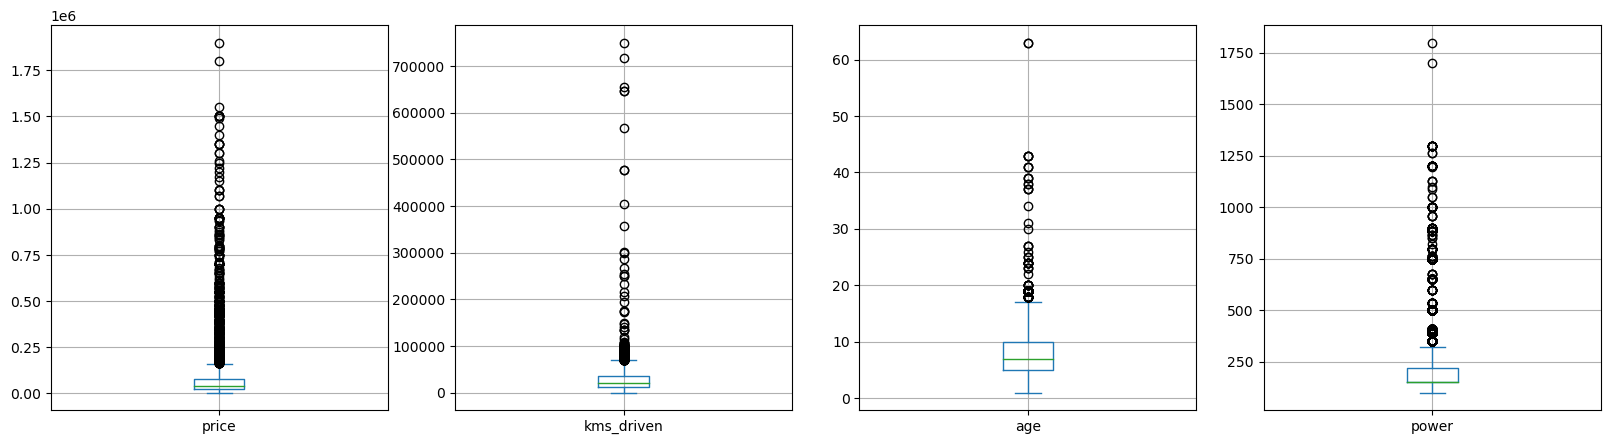

In [17]:
df[["price", "kms_driven","age","power"]].plot(kind = "box", subplots = True, grid = True, figsize = (20,5) )

In [18]:
# price column
df.price.sort_values(ascending = False).head(10)

367     1900000
4864    1800000
7671    1550000
3016    1500000
1321    1500000
1353    1500000
7404    1500000
6872    1500000
6501    1490000
8591    1450000
Name: price, dtype: int64

In [19]:
df.price.quantile(0.99)

450000.0

In [20]:
df["price"][df.price>300000]=300000

<AxesSubplot:>

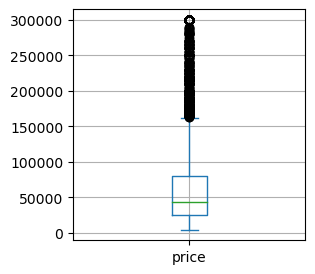

In [21]:
#checking the result by visualization
df.price.plot(kind = 'box', figsize = (3,3), grid = True)

In [22]:
# price column
df.kms_driven.sort_values(ascending = False).head(15)

7633    750000
5144    717794
9160    654984
2322    646000
2299    646000
7603    566931
5200    477976
5311    477976
3398    403833
50      357000
4760    300965
6321    300000
8345    286055
8997    266028
8911    253621
Name: kms_driven, dtype: int64

In [23]:
df["kms_driven"][df.kms_driven>100000.0]=100000.0

<AxesSubplot:>

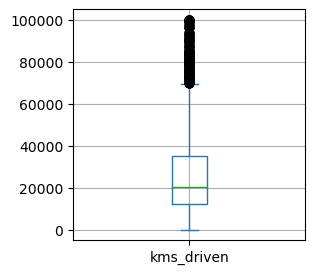

In [24]:
#checking the result by visualization
df.kms_driven.plot(kind = 'box', figsize = (3,3), grid = True)

In [25]:
# age column
df.age.sort_values(ascending = False).head(15)

6689    63
6818    63
2980    43
2978    43
3112    43
3110    43
1519    41
7467    41
7505    41
334     39
5017    39
5866    39
6834    38
6685    38
5346    37
Name: age, dtype: int64

In [26]:
df["age"][df.age>=22]=22

<AxesSubplot:>

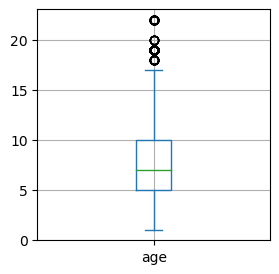

In [27]:
#checking the result by visualization
df.age.plot(kind = 'box', figsize = (3,3), grid = True)

In [28]:
# power column
df.power.sort_values(ascending = False).head(15)

367     1800
1362    1700
7481    1300
617     1300
167     1300
4725    1300
2301    1300
224     1300
4827    1300
2300    1300
3072    1300
124     1299
1353    1262
1321    1262
4903    1200
Name: power, dtype: int64

In [29]:
df["power"][df.power>600.0]=600.0

<AxesSubplot:>

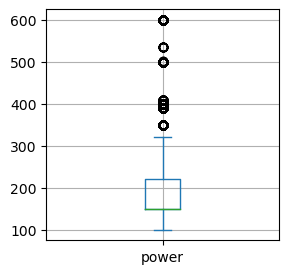

In [30]:
#checking the result by visualization
df.power.plot(kind = 'box', figsize = (3,3), grid = True)

price            AxesSubplot(0.125,0.11;0.168478x0.77)
kms_driven    AxesSubplot(0.327174,0.11;0.168478x0.77)
age           AxesSubplot(0.529348,0.11;0.168478x0.77)
power         AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

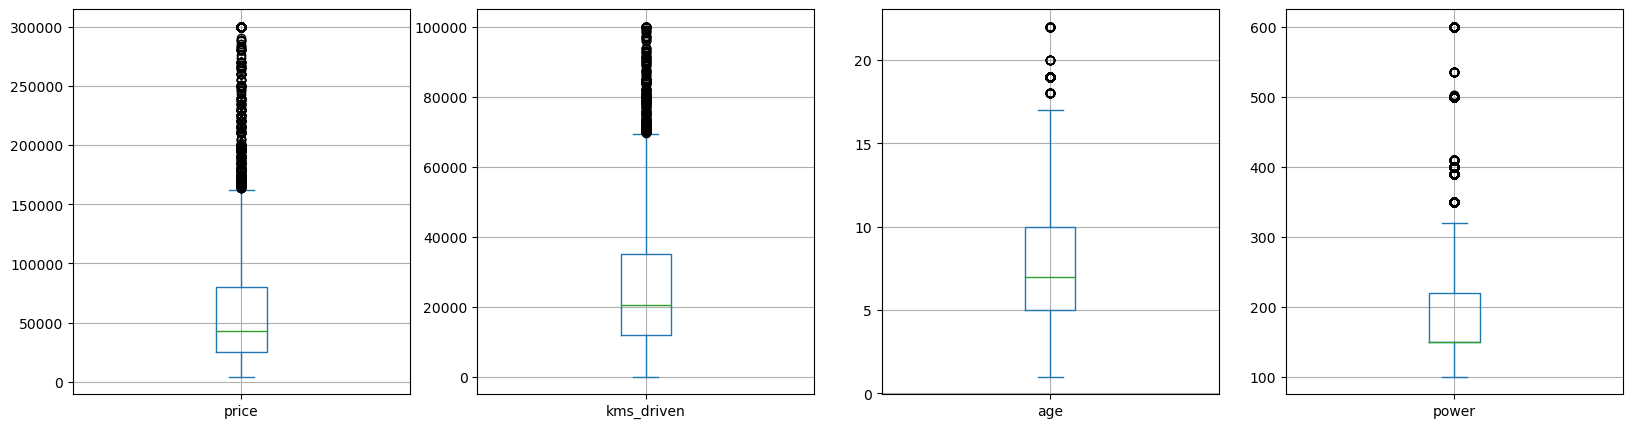

In [31]:
# final check after treating the outliers
df[["price", "kms_driven","age","power"]].plot(kind = "box", subplots = True, grid = True, figsize = (20,5) )


In [32]:
round(df.describe(), ndigits =2)

,price,kms_driven,age,power
count,32648.00,32648.00,32648.00,32648.00
mean,62615.87,26133.40,8.04,208.61
std,58581.76,19507.59,3.95,114.19
min,4400.00,1.00,1.00,100.00
25%,25000.00,12000.00,5.00,150.00
50%,43000.00,20373.00,7.00,150.00
75%,80000.00,35000.00,10.00,220.00
max,300000.00,100000.00,22.00,600.00


<AxesSubplot:ylabel='Frequency'>

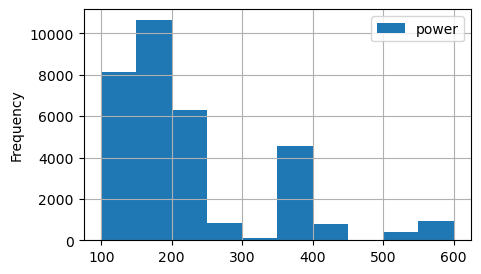

In [33]:
# checking the skewness by histogram
df[["power"]].plot(kind = "hist",  grid = True, figsize = (5,3) )


<AxesSubplot:ylabel='Frequency'>

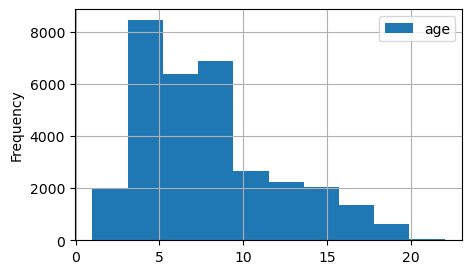

In [34]:
df[["age"]].plot(kind = "hist",  grid = True, figsize = (5,3) )

<AxesSubplot:ylabel='Frequency'>

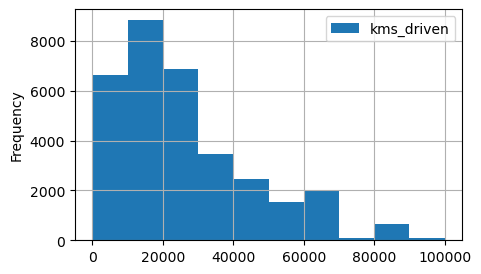

In [35]:
df[["kms_driven"]].plot(kind = "hist",  grid = True, figsize = (5,3) )

<AxesSubplot:ylabel='Frequency'>

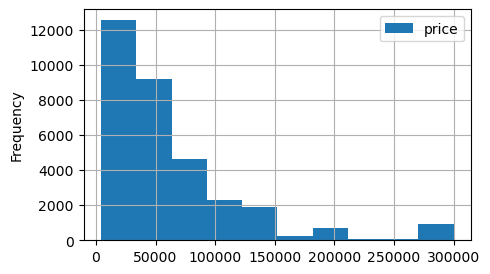

In [36]:
df[["price"]].plot(kind = "hist",  grid = True, figsize = (5,3) )

In [37]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,300000,Delhi,110,First Owner,8,600,Triumph
3,65000,Bangalore,16329,First Owner,4,180,TVS
4,80000,Bangalore,10000,First Owner,3,150,Yamaha


# bivariate analysis

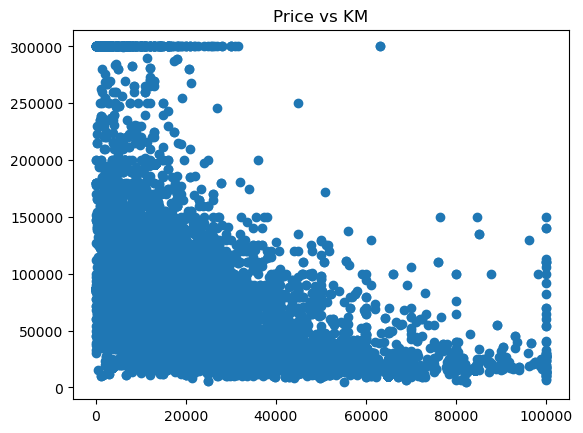

In [38]:
plt.scatter(df.kms_driven,df.price)
plt.title("Price vs KM")
plt.show()


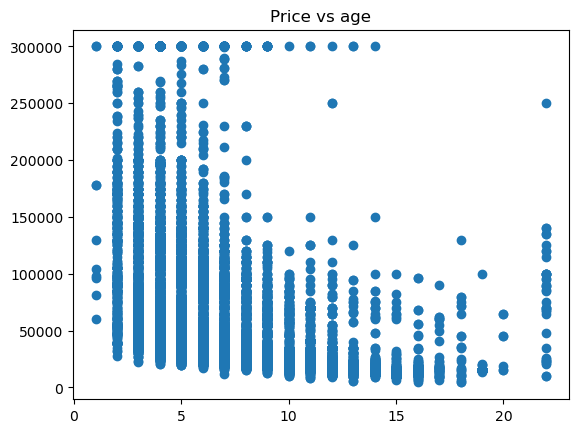

In [39]:
plt.scatter(df.age,df.price)
plt.title("Price vs age")
plt.show()

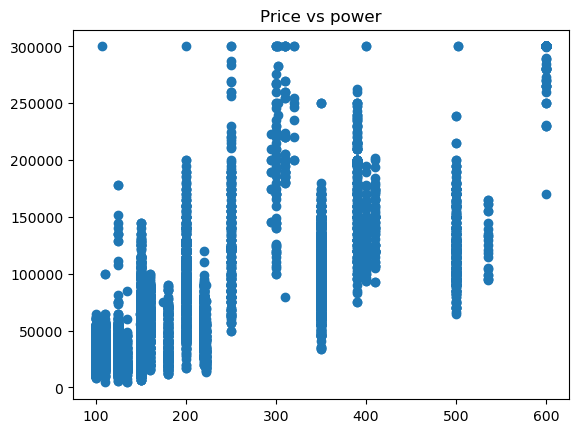

In [40]:
plt.scatter(df.power,df.price)
plt.title("Price vs power")
plt.show()

### hence age and price is negatively correlated and power is positively correlated

In [41]:
df[["price", "kms_driven","age","power"]].corr()

,price,kms_driven,age,power
price,1.000000,-0.444110,-0.539492,0.866757
kms_driven,-0.444110,1.000000,0.547088,-0.303361
age,-0.539492,0.547088,1.000000,-0.368894
power,0.866757,-0.303361,-0.368894,1.000000


<AxesSubplot:>

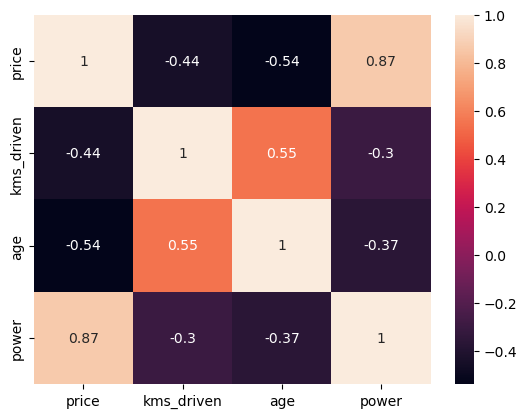

In [42]:
sns.heatmap(df[["price", "kms_driven","age","power"]].corr(), annot = True)

# hence only age and power is statistically correlated with price of the bike

## now lets check the categorical variables

In [43]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,300000,Delhi,110,First Owner,8,600,Triumph
3,65000,Bangalore,16329,First Owner,4,180,TVS
4,80000,Bangalore,10000,First Owner,3,150,Yamaha


<AxesSubplot:ylabel='owner'>

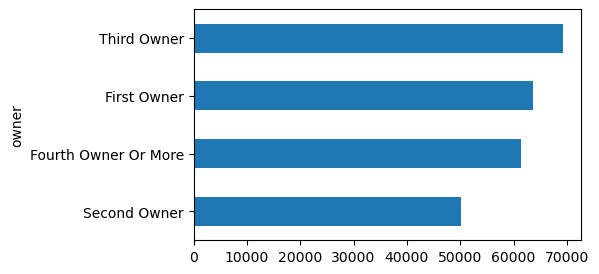

In [44]:
df.groupby(["owner"]).price.mean().sort_values(ascending = True).plot(kind = "barh", figsize = (5,3))

<AxesSubplot:title={'center':'price'}, xlabel='owner'>

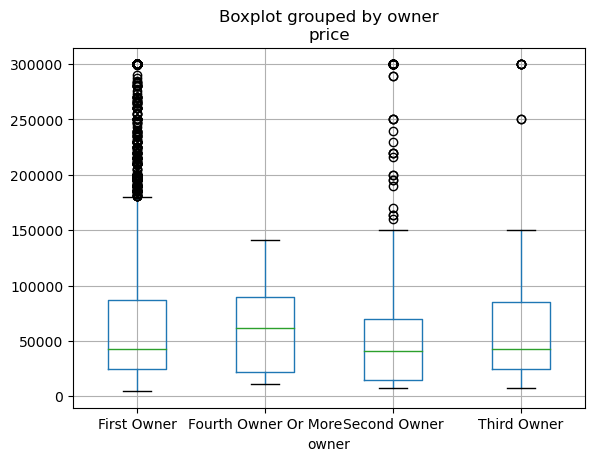

In [45]:
df.boxplot("price", by = "owner")

# conducting annova test to check if owner is really dependent on price

In [46]:
from scipy.stats import f_oneway
value = f_oneway(df['price'][df.owner == 'Fourth Owner Or More'] ,df['price'][df.owner == 'Third Owner'], df['price'][df.owner == 'First Owner'], df['price'][df.owner == 'Second Owner'])

In [47]:
print(value)

F_onewayResult(statistic=42.090837231504636, pvalue=3.875551195944787e-27)


### p value is greater than 0.05, so owner is not statistically significant with Price

## now lets check for the brand column

<AxesSubplot:ylabel='brand'>

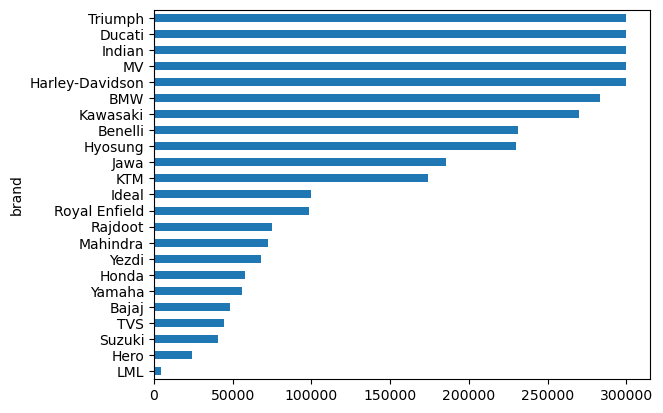

In [48]:
df.groupby(["brand"]).price.mean().sort_values(ascending = True).plot(kind = "barh")

<AxesSubplot:title={'center':'price'}, xlabel='brand'>

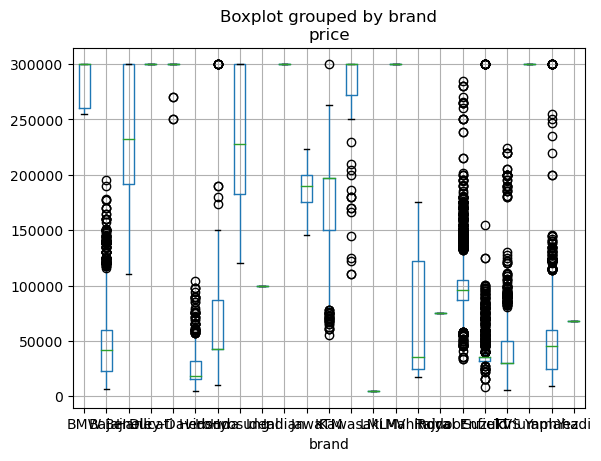

In [49]:
df.boxplot("price", by = "brand")

In [50]:
df.brand.nunique()

23

## thus the brand column is statistically significant with price and it is evident form the box plot, but the number of categories is 23, which is too high, so it needs treatment

<AxesSubplot:xlabel='brand'>

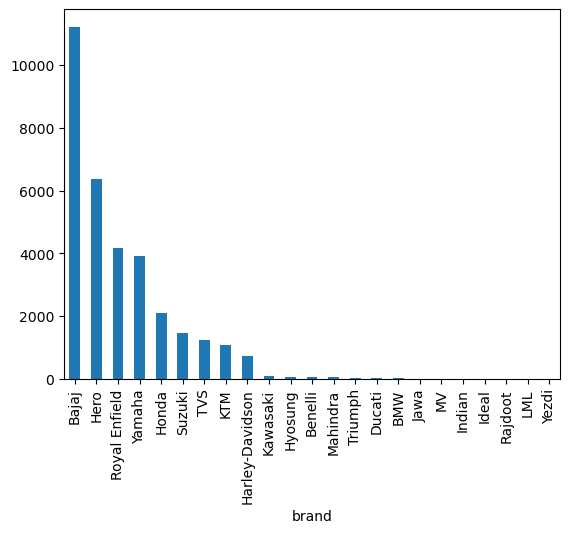

In [51]:
df.groupby(["brand"]).size().sort_values(ascending = False).plot(kind="bar")

In [52]:
df.brand.unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [53]:
df['brand'][df.brand.isin(['Honda','Suzuki','TVS','KTM','Harley-Davidson','Kawasaki','Hyosung','Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal','Jawa', 'BMW', 'Indian','Benelli','Triumph','Mahindra','Ducati'])]="Others"

In [54]:
df.brand.unique()

array(['Others', 'Royal Enfield', 'Yamaha', 'Hero', 'Bajaj'], dtype=object)

<AxesSubplot:xlabel='brand'>

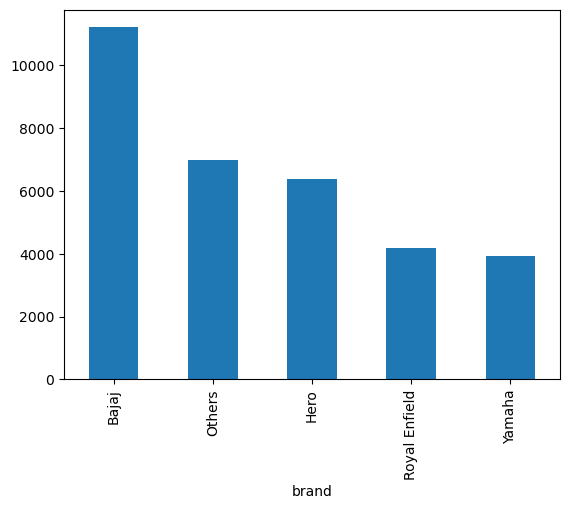

In [55]:
df.groupby(["brand"]).size().sort_values(ascending = False).plot(kind="bar")

<AxesSubplot:title={'center':'price'}, xlabel='brand'>

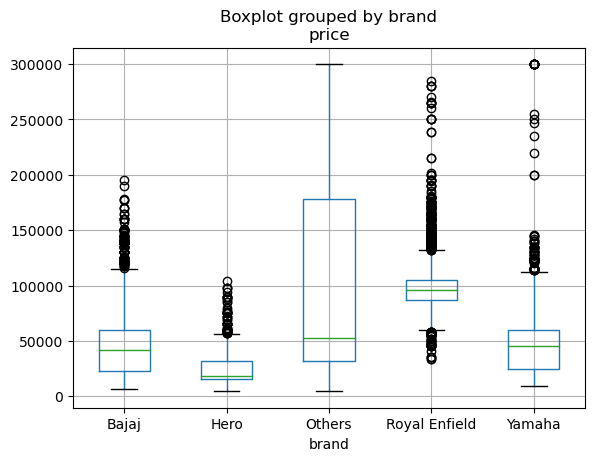

In [56]:
# box plot after treating the categorical column
df.boxplot("price", by = "brand")

In [57]:
df.columns

Index(['price', 'city', 'kms_driven', 'owner', 'age', 'power', 'brand'], dtype='object')

In [58]:
#final data for regression model
df_final = df[['brand', 'age', 'power','price']]
df_final.head()

,brand,age,power,price
0,Others,3,110,35000
1,Royal Enfield,4,350,119900
2,Others,8,600,300000
3,Others,4,180,65000
4,Yamaha,3,150,80000


In [59]:
df_final = pd.get_dummies(df_final)

In [60]:
df_final.head()

,age,power,price,brand_Bajaj,brand_Hero,brand_Others,brand_Royal Enfield,brand_Yamaha
0,3,110,35000,0,0,1,0,0
1,4,350,119900,0,0,0,1,0
2,8,600,300000,0,0,1,0,0
3,4,180,65000,0,0,1,0,0
4,3,150,80000,0,0,0,0,1


In [61]:
df_final.drop(['brand_Others'],axis=1, inplace = True)

In [62]:
df_final.head()

,age,power,price,brand_Bajaj,brand_Hero,brand_Royal Enfield,brand_Yamaha
0,3,110,35000,0,0,0,0
1,4,350,119900,0,0,1,0
2,8,600,300000,0,0,0,0
3,4,180,65000,0,0,0,0
4,3,150,80000,0,0,0,1


In [63]:
df_final.columns

Index(['age', 'power', 'price', 'brand_Bajaj', 'brand_Hero',
       'brand_Royal Enfield', 'brand_Yamaha'],
      dtype='object')

In [64]:
X= df_final.drop(['price'], axis = 1)

In [65]:
y = df_final.price

In [66]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22853, 6)
(22853,)
(9795, 6)
(9795,)


In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [68]:
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
print(lr.coef_)
print(lr.intercept_)

[ -3240.46727438    480.46395145 -28556.99691709  -6116.0557249
 -63317.67834977  -8224.22623346]
8537.07136674373


In [70]:
pred_values = lr.predict(X_test)

In [71]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, lr.predict(X_train)))


R2 Value: 0.8981679566000869


In [72]:
# measuring the goodness of fit in my testing data
print('R2 Value:',metrics.r2_score(y_test, lr.predict(X_test)))


R2 Value: 0.9024868068155858


In [78]:
lr.score(X_test,y_test)

0.9024868068155858

## Achieved 90 % accuracy in prediction

We will also check the accuracy by other algorithms

### We will also check the accuracy by other algorithms


# XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()

In [74]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
xgb.score(X_train,y_train)

0.976630050870868

In [76]:
xgb.score(X_test,y_test)

0.972751335039189

# Random forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rm = RandomForestRegressor()

In [82]:
rm.fit(X_test,y_test)

RandomForestRegressor()

In [83]:
rm.score(X_test,y_test)

0.9763148579003714

In [84]:
rm.score(X_train,y_train)

0.9704362303064916

# So both random forest and xgboost is giving me a higher accuracy than simple linear regression and the model is a balanced fit model.